In [25]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd
import numpy as np

In [219]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Confusion matrix
By definition, entry $i$, $j$ in a confusion matrix is the number of observations actually in group $i$, but predicted to be in group $j$.

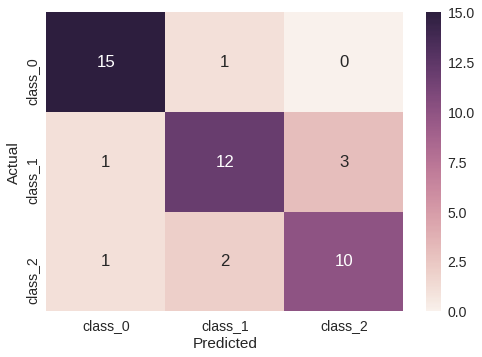

In [220]:
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = dataset.target_names, columns = dataset.target_names)

sn.set(font_scale=1.4)
ax = sn.heatmap(df_cm, annot=True)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

### Accuracy
The fraction of correct predictions.
$$ACC = \frac{TP+TN}{P+N} = \frac{TP+TN}{TP+TN+FP+FN}$$

### Precision or positive predictive value
Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative.
$$PPV = \frac{TP}{TP+FP}$$

### Recall or true positive ratio
Recall is the ability of the classifier to find all the positive samples.
$$TPR = \frac{TP}{P} = \frac{TP}{TP+FN}$$

### F-measure
Can be interpreted as a weighted harmonic mean of the precision and recall. 
$$F1 = \frac{PPV \cdot TPR}{PPV+TPR} = \frac{2TP}{2TP+FP+FN}$$

### From binary to multiclass and multilabel

- "macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

- "weighted" accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

- "micro" gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

- "samples" applies only to multilabel problems. It does not calculate a per-class measure, instead calculating the metric over the true and predicted classes for each sample in the evaluation data, and returning their (sample_weight-weighted) average.

- Selecting average=None will return an array with the score for each class.


In [14]:
def compute_scores_with_cvs_for_metrics(metrics, x, y, cv):
        return {m: np.mean(cross_val_score(clf, x, y, cv=cv, scoring=m, n_jobs=-1)) for m in metrics}

In [15]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro']

compute_scores_with_cvs_for_metrics(metrics, X, y, 10)

{'accuracy': 0.85076754385964914,
 'f1_micro': 0.85076754385964914,
 'precision_micro': 0.85076754385964914,
 'recall_micro': 0.85076754385964914}

In [73]:
def run_test(X, y, clf, test_size):
    results = {}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['cv_score'] = np.mean(cross_val_score(clf, X, y, cv=8, scoring='f1_micro', n_jobs=-1))
    
    return results

In [115]:
diabetes_features = 'times_pregnant plasma blood_pressure skin_thickness insulin mass_idx pedigree age'.split()
glass_features = 'ri, na, mg, al, si, k, ca, ba, fe'.split(', ')

wine = datasets.load_wine()
diabetes = pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9)
glass = pd.read_csv('data/glass.data')
glass.drop(['id'], axis=1, inplace=True)

test_size = 0.25

test_data = [
        ('wine', wine.data, wine.target, GaussianNB(), test_size),
        ('wine', wine.data, wine.target, MultinomialNB(), test_size),
        ('diabetes', diabetes[diabetes_features], diabetes['class'], GaussianNB(), test_size),
        ('diabetes', diabetes[diabetes_features], diabetes['class'], MultinomialNB(), test_size),
        ('glass', glass[glass_features], glass['class'], GaussianNB(), test_size),
        ('glass', glass[glass_features], glass['class'], MultinomialNB(), test_size),
    ]

measures = []

for name, X, y, clf, test_size in test_data:
    scores = run_test(X, y, clf, test_size)
    scores['name'] = name
    scores['clf'] = clf.__class__.__name__
    
    measures.append(scores)
    
measures

[{'accuracy': 0.90909090909090906,
  'clf': 'GaussianNB',
  'cv_score': 0.96146245059288538,
  'name': 'wine'},
 {'accuracy': 0.83216783216783219,
  'clf': 'MultinomialNB',
  'cv_score': 0.86141304347826098,
  'name': 'wine'},
 {'accuracy': 0.71219512195121948,
  'clf': 'GaussianNB',
  'cv_score': 0.7527672273467173,
  'name': 'diabetes'},
 {'accuracy': 0.56097560975609762,
  'clf': 'MultinomialNB',
  'cv_score': 0.60280792186652188,
  'name': 'diabetes'},
 {'accuracy': 0.43604651162790697,
  'clf': 'GaussianNB',
  'cv_score': 0.41896164021164017,
  'name': 'glass'},
 {'accuracy': 0.45930232558139533,
  'clf': 'MultinomialNB',
  'cv_score': 0.44774140211640212,
  'name': 'glass'}]

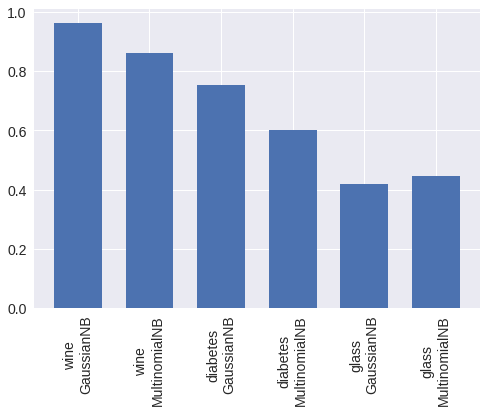

In [99]:
cv_scores = [m['cv_score'] for m in measures]
names = [m['name'] + '\n' + m['clf'] for m in measures]

y = cv_scores
x = range(len(names))
plt.bar(x, y, width)
t = plt.xticks(x, names, rotation='vertical')

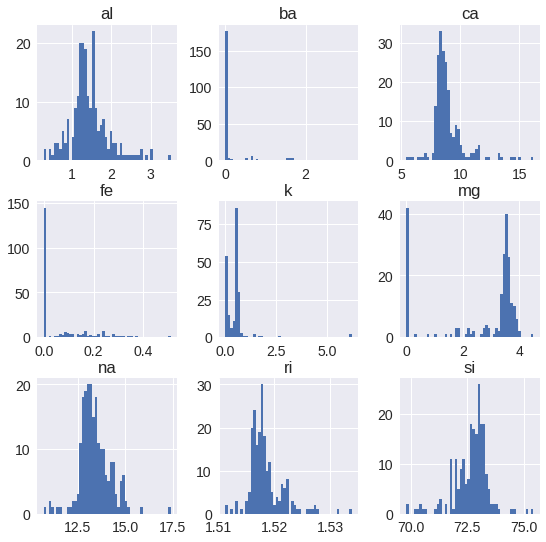

In [105]:
h = glass.drop(['class'], axis=1).hist(figsize=(9, 9), bins=50)

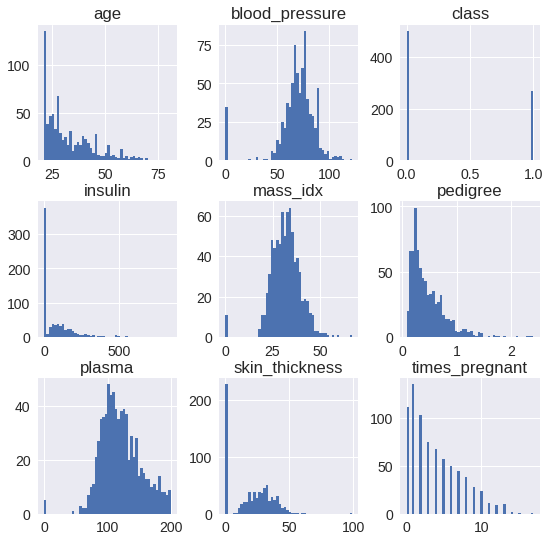

In [106]:
h = diabetes.hist(figsize=(9, 9), bins=50)

In [113]:
h = pd.DataFrame(wine.data).hist(figsize=(12, 12), bins=50)

In [159]:
def run_accuracy_test(X, y, clf, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    return round(accuracy_score(y_test, y_pred), 3)

In [184]:
wine = datasets.load_wine()

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

test_data = [
        (wine.data, wine.target, GaussianNB()),
        (wine.data, wine.target, MultinomialNB()),
    ]

column_names = ['Dokładność [%]', 'Zbiór testowy [%]', 'Klasyfikator']

measures = pd.DataFrame([], columns=column_names)

for test_size in test_sizes:
    for X, y, clf in test_data:
        accuracy = run_accuracy_test(X, y, clf, test_size)
        
        df = pd.DataFrame([[accuracy, test_size, clf.__class__.__name__[0]]], columns=column_names)
        measures = measures.append(df, ignore_index=True)
        
measures

Dokładność [%]  Zbiór testowy [%] Klasyfikator
0            0.889                0.1            G
1            1.000                0.1            M
2            0.972                0.2            G
3            0.917                0.2            M
4            0.981                0.3            G
5            0.870                0.3            M
6            0.986                0.4            G
7            0.847                0.4            M
8            0.955                0.5            G
9            0.910                0.5            M
10           0.981                0.6            G
11           0.822                0.6            M
12           0.960                0.7            G
13           0.904                0.7            M
14           0.958                0.8            G
15           0.881                0.8            M
16           0.596                0.9            G
17           0.714                0.9            M

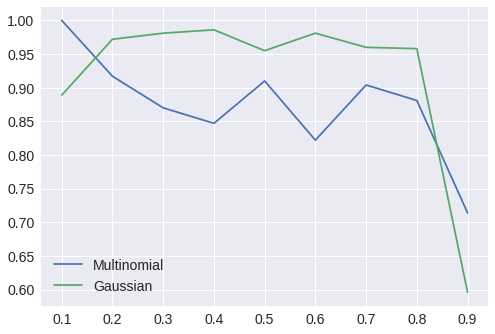

In [210]:
multi_acc = measures[measures['Klasyfikator'] == 'M']['Dokładność [%]'].values
gaussian_acc = measures[measures['Klasyfikator'] == 'G']['Dokładność [%]'].values

ax = plt.subplot()

ax.plot(test_sizes, multi_acc, label='Multinomial')
ax.plot(test_sizes, gaussian_acc, label='Gaussian')

ax.legend(*ax.get_legend_handles_labels())


In [188]:
print(measures.to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  Dokładność [\%] &  Zbiór testowy [\%] & Klasyfikator \\
\midrule
0  &           0.889 &                0.1 &            G \\
1  &           1.000 &                0.1 &            M \\
2  &           0.972 &                0.2 &            G \\
3  &           0.917 &                0.2 &            M \\
4  &           0.981 &                0.3 &            G \\
5  &           0.870 &                0.3 &            M \\
6  &           0.986 &                0.4 &            G \\
7  &           0.847 &                0.4 &            M \\
8  &           0.955 &                0.5 &            G \\
9  &           0.910 &                0.5 &            M \\
10 &           0.981 &                0.6 &            G \\
11 &           0.822 &                0.6 &            M \\
12 &           0.960 &                0.7 &            G \\
13 &           0.904 &                0.7 &            M \\
14 &           0.958 &                0.8 &            G \